Assuming we have the differential equation: $$ \frac{\partial u}{\partial t} = \frac{1}{u} $$
We can find the analytical solution as follows:
$$ \frac{\partial u}{\partial x} = \frac{1}{u} \to \int \left[ u \frac{\partial u}{\partial t} \right] dt = \int \left[1 \right] dt $$
$$ \frac{u^2}{2} + c = t \to u(t) = \sqrt{2t + c} $$
By applying the initial condition (IC) $u(0) = 2$, we can see we have a particular solution of: $$ u(t) = \sqrt{2t + 4} $$

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.animation as ani
from time import time

In [3]:
# Old Function, though does work (more efficiently), for scalar inputs
def RK3s_step(pypt, y0, dt):
    """
    RK3_step does the Runga-Kutta 3 Method on a differential system for a single time step
    Inputs:
        pypt: current array of (∂y/∂t)
        y0: current array of y[i]
        dt: time step size
    """

    pypt_0 = pypt(y0)
    y_step1 = y0 + dt * 8/15 * pypt_0

    pypt_step1 = pypt(y_step1)
    y_step2 = y_step1 + dt * (-17/60 * pypt_0 + 5/12 * pypt_step1)

    pypt_step2 = pypt(y_step2)
    y_step3 = y_step2 + dt * (-5/12 * pypt_step1 + 3/4 * pypt_step2)
    
    return y_step3

For each step, we will evaluate the following, where $\frac{du}{dt} = f(u)$ (autonomous). 
Defining $u_n = u_0$, $u_{n+1} = u_3$:
$$ u_1 = u_0 + \Delta t \frac{8}{15} f(u_0) $$
$$ u_2 = u_1 + \Delta t \left( -\frac{17}{60} f(u_0) + \frac{5}{12} f(u_1) \right) $$
$$ u_3 = u_2 + \Delta t \left( \frac{5}{12} f(u_1) + \frac{3}{4} f(u_2) \right) $$

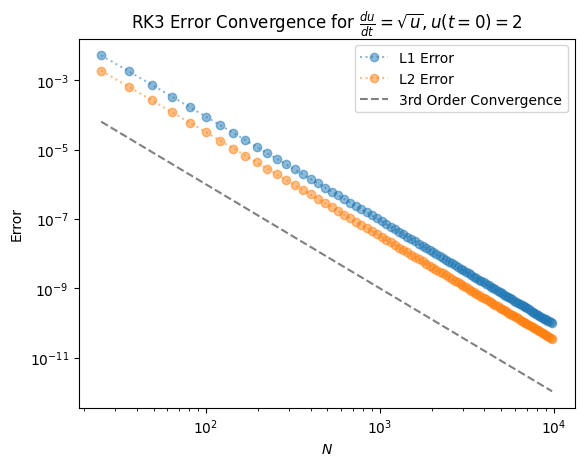

In [4]:
from RK3 import RK3_step

def La_Norm(e, dx, a):
    N = len(e)
    La = 0
    for i in range(0, N):
        La += np.abs(e[i]) ** a
    La = (dx * La) ** (1/a)
    return La

def dudt(u):
    # return 1/u
    # return u
    return np.sqrt(u)

G = np.arange(5, 100) ** 2
l1_error = np.zeros(len(G))
l2_error = np.zeros(len(G))

for g in range(0, len(G)):
    t_dom = [0, 10]
    T = G[g]
    t = np.linspace(t_dom[0], t_dom[1], T, endpoint = False)
    dt = t_dom[1]/T

    u_num = np.empty(shape = (T))
    u_ana = np.empty(shape = (T))
    u_num[0] = 2
    u_ana[0] = 2

    for n in range(0, T - 1):
        u_num[n + 1] = RK3_step(dudt, u_num[n], dt)
        
        # u_ana[n + 1] = np.sqrt(2 * t[n + 1] + 4)
        # u_ana[n + 1] = 2 * np.exp(t[n + 1])
        u_ana[n + 1] = (t[n + 1] + np.sqrt(8)) ** 2 / 4

    e = u_num - u_ana
    
    l1_error[g] = La_Norm(e, dt, 1)
    l2_error[g] = La_Norm(e, dt, 2)

plt.loglog(G, l1_error, ':o', label = "L1 Error", alpha = 0.5)
plt.loglog(G, l2_error, ':o', label = "L2 Error", alpha = 0.5)
plt.loglog(G, 1 / (G ** 3), linestyle = 'dashed', label = '3rd Order Convergence', color = 'grey')
plt.ylabel("Error")
plt.xlabel(r"$N$")
plt.legend()

# plt.title(r"RK3 Error Convergence for $\frac{du}{dt} = \frac{1}{u}, u(t = 0) = 2 $")
# plt.title(r"RK3 Error Convergence for $\frac{du}{dt} = u, u(t = 0) = 2 $")
plt.title(r"RK3 Error Convergence for $\frac{du}{dt} = \sqrt{u}, u(t = 0) = 2 $")

plt.show() 